<a href="https://colab.research.google.com/github/nhatminh-it/CS114.K21/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICT TIME TO RUN FROM SIZE DATA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Load, check, handing data**

Lấy dữ liệu xuống thế nào?
Sử dụng thư viện pandas để đọc file

In [0]:
dataset = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names =['size', 'time'] )

In [3]:
dataset.head()

,size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [4]:
dataset.describe()

,size,time
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


#### **Data visualization**

<Figure size 576x576 with 0 Axes>

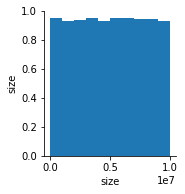

In [5]:
plt.figure(figsize=(8,8))
features = dataset.columns[:-1]
sns.pairplot(dataset[features],palette='coolwarm')
plt.show()

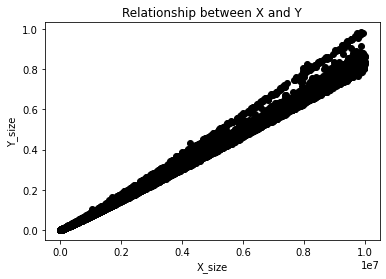

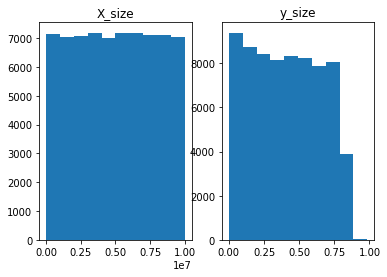

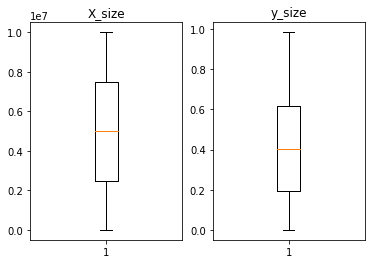

In [6]:
X_size = dataset['size']
y_size = dataset['time']
plt.title('Relationship between X and Y')
plt.scatter(X_size, y_size,  color='black')
plt.xlabel('X_size')
plt.ylabel('Y_size')
plt.show()

plt.subplot(1, 2, 1)
plt.title('X_size')
plt.hist(X_size)

plt.subplot(1, 2, 2)
plt.title('y_size')
plt.hist(y_size)
plt.show()

plt.subplot(1, 2, 1)
plt.title('X_size')
plt.boxplot(X_size)

plt.subplot(1, 2, 2)
plt.title('y_size')
plt.boxplot(y_size)
plt.show()

#### **Evaluate Some Algorithms**

Chọn model và train thế nào? 

1.   Đánh giá một vài model
2.   Chọn model tốt nhất để train



In [0]:
# Chia data
X = dataset['size']
y = dataset['time']
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
X_train = X_train.values.reshape(-1,1)
X_validation = X_validation.values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)
Y_validation = Y_validation.values.reshape(-1,1)

In [8]:
# Đánh giá một số model
models = []
models.append(('LR :', LinearRegression())) #Linear Regression
models.append(('SVR:', SVR())) #Support Vector Regression
models.append(('DTR:', DecisionTreeRegressor(random_state=1))) #Decision Tree Regression
models.append(('RFR:', RandomForestRegressor(n_estimators = 10, random_state=1))) #Random Forest Regression
# Evaluate each model in turn
names = []
for name, model in models:
  model.fit(X_train,Y_train)
  y_predict = model.predict(X_validation)
  results = mean_absolute_error(Y_validation,y_predict)
  print(name,results)

LR : 0.00831551754510758
SVR: 0.06872256811230473


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DTR: 0.009799554658390212


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RFR: 0.008553830856725944


#### **Linear Regression is the best model**
Make predictions on validation dataset

Viết ứng dụng thực hiện việc predict cho một mẫu dữ liệu mới thế nào?

*   Tạo ra 1 mẫu dữ liệu mới bằng biến test
*   Cho test vô model để dự đoán



In [9]:
test = [[4032139]]
LR_model = LinearRegression()
LR_model.fit(X_train,Y_train)
y = LR_model.predict(test)
y

array([[0.32502824]])

Khả năng dự đoán của ứng dụng là tốt hay không? Làm sao biết?

*   Khả năng dự đoán của model là tốt
*   Ở bước đánh giá model đã đánh giá giá trị mean absolute error của model linear regression là rất thấp ~ 0.0083



# **Round 3 **

In [0]:
data_3 = pd.read_csv("http://cs.uit.edu.vn/data3.txt",sep=",", names =['size', 'time'] )

In [11]:
data_3.head()

,size,time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


In [0]:
X_3 = data_3['size']
y_3 = data_3['time']

In [0]:
X_3 = X_3.values.reshape(-1,1)
y_3 = y_3.values.reshape(-1,1)

In [14]:
y_3_predict = LR_model.predict(X_3)
results = mean_absolute_error(y_3,y_3_predict)
results

0.12275577157511128

Kết quả tệ hơn với Data 3, trường hợp xấu nhất là overfitting

Xây dựng model mới sử dụng phương pháp tăng số features

In [0]:
data_3['size**2']=data_3['size']*data_3['size']
data_3['size.log(size)']=data_3['size']*np.log10(data_3['size'])
columns_titles = ["size","size**2","size.log(size)","time"]
data_3=data_3.reindex(columns=columns_titles)


In [16]:
data_3.head()

,size,size**2,size.log(size),time
0,37837612,1431684881862544,2.867305e+08,4.12166
1,37395246,1398404423400516,2.831873e+08,3.92089
2,36610827,1340352653623929,2.769100e+08,3.21540
3,29555651,873536506033801,2.207996e+08,2.54506
4,25928216,672272384942656,1.922259e+08,2.21831


In [0]:
X_new = data_3.iloc[:,0:3]
y_new = data_3.iloc[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X_new, y_new, test_size=0.20, random_state=1)

In [18]:
LR_model_new = LinearRegression()
LR_model_new.fit(X_train,Y_train)
y_predict = LR_model_new.predict(X_validation)
results = mean_absolute_error(Y_validation,y_predict)
results 

0.04301142916048519

Model mới có performance tốt hơn model cũ (0.04 so với 0.12)

Do sử dụng nhiểu feature để dự đoán hơn nên model mới dự đoán tốt hơn